In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

581

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | punta arenas
Processing Record 2 of Set 12 | nikolskoye
Processing Record 3 of Set 12 | khatanga
Processing Record 4 of Set 12 | east london
Processing Record 5 of Set 12 | new norfolk
Processing Record 6 of Set 12 | port elizabeth
Processing Record 7 of Set 12 | naze
Processing Record 8 of Set 12 | saint-philippe
Processing Record 9 of Set 12 | bela
Processing Record 10 of Set 12 | mancio lima
Processing Record 11 of Set 12 | hithadhoo
Processing Record 12 of Set 12 | mazyr
Processing Record 13 of Set 12 | bairiki
Processing Record 14 of Set 12 | hilo
Processing Record 15 of Set 12 | kulhudhuffushi
Processing Record 16 of Set 12 | yellowknife
Processing Record 17 of Set 12 | hobyo
Processing Record 18 of Set 12 | rikitea
Processing Record 19 of Set 12 | mataura
Processing Record 20 of Set 12 | san patricio
Processing Record 21 of Set 12 | dingle
Processing Record 22 of Set 12 | beringovskiy
Pro

Processing Record 36 of Set 15 | saleaula
City not found. Skipping...
Processing Record 37 of Set 15 | santiago
Processing Record 38 of Set 15 | fortuna
Processing Record 39 of Set 15 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 15 | punta de bombon
Processing Record 41 of Set 15 | cidreira
Processing Record 42 of Set 15 | anadyr
Processing Record 43 of Set 15 | pimenta bueno
Processing Record 44 of Set 15 | constitucion
Processing Record 45 of Set 15 | monrovia
Processing Record 46 of Set 15 | baculin
Processing Record 47 of Set 15 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 15 | zhigansk
Processing Record 49 of Set 15 | manor
Processing Record 50 of Set 15 | kahului
Processing Record 1 of Set 16 | padang
Processing Record 2 of Set 16 | rehoboth
Processing Record 3 of Set 16 | abu dhabi
Processing Record 4 of Set 16 | raymond
Processing Record 5 of Set 16 | vostok
Processing Record 6 of Set 16 | san quintin
Processing Record 7 of Set 16 |

Processing Record 22 of Set 19 | sur
Processing Record 23 of Set 19 | ngorongoro
Processing Record 24 of Set 19 | barbar
City not found. Skipping...
Processing Record 25 of Set 19 | adamas
Processing Record 26 of Set 19 | general pico
Processing Record 27 of Set 19 | smithers
Processing Record 28 of Set 19 | araouane
Processing Record 29 of Set 19 | zhanaozen
Processing Record 30 of Set 19 | santa rita do sapucai
Processing Record 31 of Set 19 | los llanos de aridane
Processing Record 32 of Set 19 | viligili
City not found. Skipping...
Processing Record 33 of Set 19 | rudbar
Processing Record 34 of Set 19 | bendigo
Processing Record 35 of Set 19 | vestmannaeyjar
Processing Record 36 of Set 19 | lubango
Processing Record 37 of Set 19 | qaqortoq
Processing Record 38 of Set 19 | boyolangu
Processing Record 39 of Set 19 | mentok
City not found. Skipping...
Processing Record 40 of Set 19 | hokitika
Processing Record 41 of Set 19 | abu samrah
Processing Record 42 of Set 19 | hohhot
Processin

Processing Record 9 of Set 23 | karamea
City not found. Skipping...
Processing Record 10 of Set 23 | maningrida
Processing Record 11 of Set 23 | linxia
Processing Record 12 of Set 23 | grindavik
Processing Record 13 of Set 23 | marcona
City not found. Skipping...
Processing Record 14 of Set 23 | oarai
Processing Record 15 of Set 23 | ridgecrest
Processing Record 16 of Set 23 | pisco
Processing Record 17 of Set 23 | praia da vitoria
Processing Record 18 of Set 23 | flin flon
Processing Record 19 of Set 23 | almenara
Processing Record 20 of Set 23 | prigorodnyy
Processing Record 21 of Set 23 | dorogobuzh
Processing Record 22 of Set 23 | finschhafen
Processing Record 23 of Set 23 | assiniboia
Processing Record 24 of Set 23 | louisbourg
City not found. Skipping...
Processing Record 25 of Set 23 | marzuq
Processing Record 26 of Set 23 | yartsevo
Processing Record 27 of Set 23 | ugoofaaru
Processing Record 28 of Set 23 | luangwa
Processing Record 29 of Set 23 | nabire
Processing Record 30 of

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,61,0,5.75,CL,2021-09-05 22:55:12
1,Nikolskoye,59.7035,30.7861,47.01,79,96,5.30,RU,2021-09-05 22:59:30
2,Khatanga,71.9667,102.5000,49.15,85,77,7.92,RU,2021-09-05 22:59:06
3,East London,-33.0153,27.9116,64.35,68,100,10.65,ZA,2021-09-05 22:59:30
4,New Norfolk,-42.7826,147.0587,51.71,71,7,3.00,AU,2021-09-05 22:59:09
5,Port Elizabeth,-33.9180,25.5701,55.69,88,75,14.97,ZA,2021-09-05 22:59:31
6,Naze,28.3667,129.4833,79.72,83,99,6.58,JP,2021-09-05 22:59:18
7,Saint-Philippe,-21.3585,55.7679,67.59,81,50,12.84,RE,2021-09-05 22:59:31
8,Bela,25.9333,81.9833,85.69,70,100,5.17,IN,2021-09-05 22:59:32
9,Mancio Lima,-7.6142,-72.8958,75.27,100,90,4.61,BR,2021-09-05 22:59:32


In [10]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-09-05 22:55:12,-53.1500,-70.9167,48.31,61,0,5.75
1,Nikolskoye,RU,2021-09-05 22:59:30,59.7035,30.7861,47.01,79,96,5.30
2,Khatanga,RU,2021-09-05 22:59:06,71.9667,102.5000,49.15,85,77,7.92
3,East London,ZA,2021-09-05 22:59:30,-33.0153,27.9116,64.35,68,100,10.65
4,New Norfolk,AU,2021-09-05 22:59:09,-42.7826,147.0587,51.71,71,7,3.00
5,Port Elizabeth,ZA,2021-09-05 22:59:31,-33.9180,25.5701,55.69,88,75,14.97
6,Naze,JP,2021-09-05 22:59:18,28.3667,129.4833,79.72,83,99,6.58
7,Saint-Philippe,RE,2021-09-05 22:59:31,-21.3585,55.7679,67.59,81,50,12.84
8,Bela,IN,2021-09-05 22:59:32,25.9333,81.9833,85.69,70,100,5.17
9,Mancio Lima,BR,2021-09-05 22:59:32,-7.6142,-72.8958,75.27,100,90,4.61


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1630597685.3912075

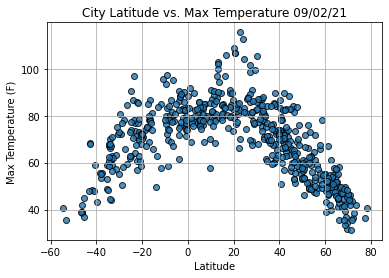

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

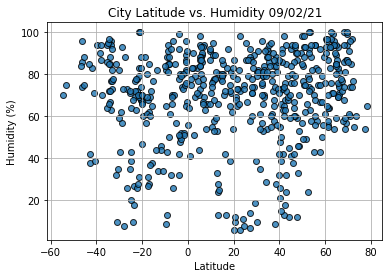

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

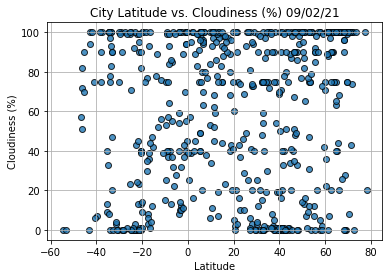

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

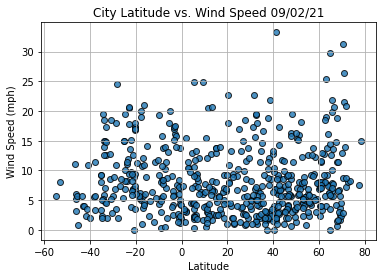

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Champerico,GT,2021-09-02 14:53:31,14.3000,-91.9167,89.73,78,83,6.55
4,Carolina,PR,2021-09-02 14:51:41,18.3808,-65.9574,89.73,65,40,9.22
5,Fortuna,US,2021-09-02 14:53:40,40.5982,-124.1573,50.99,73,90,3.00
6,Meulaboh,ID,2021-09-02 14:49:08,4.1363,96.1285,77.43,83,83,4.61
7,Leningradskiy,RU,2021-09-02 14:53:42,69.3833,178.4167,31.51,99,100,1.68


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

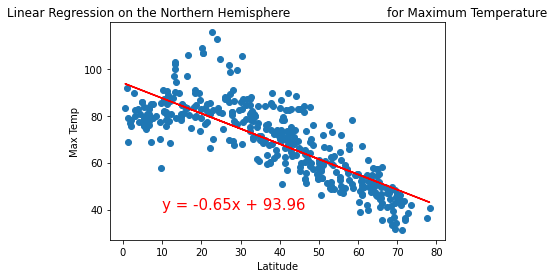

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

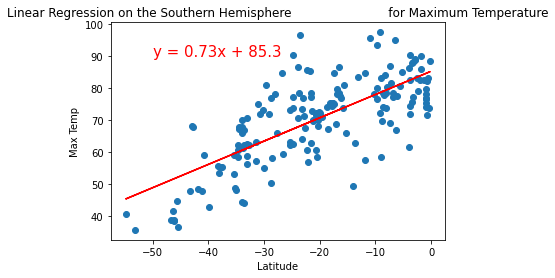

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

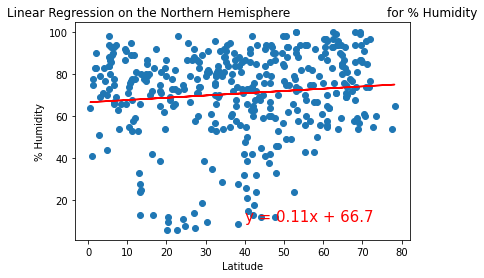

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

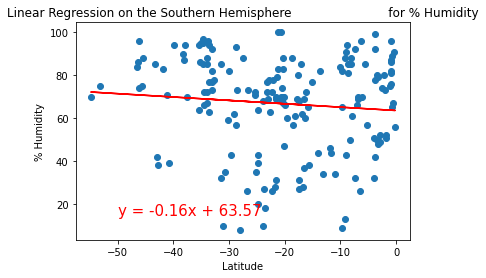

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

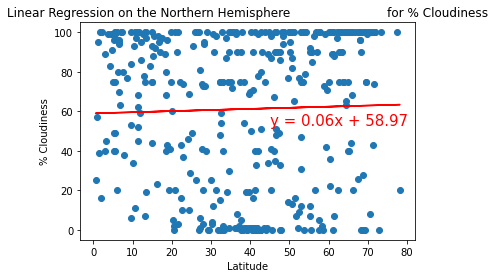

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,53))

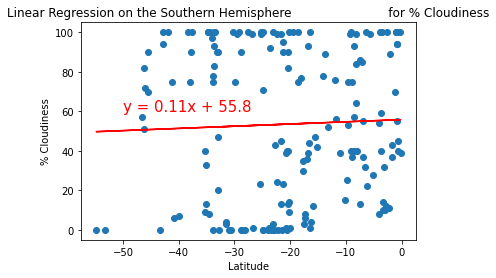

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

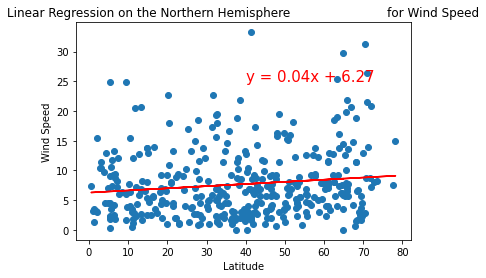

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

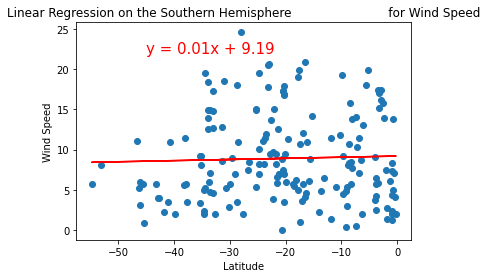

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-45,22))